# Tutorial for simple supervised classification learning

This tutorial is a simple walkthrough of supervised classification learning using the famous Iris flower dataset.

Goal: 
* Exploratory data analysis
* Fit logistic and svm clustering algorithim
* Optimize


In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
from sklearn import datasets 

In [56]:
# Load dataset
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [57]:
# Create Dataframes
iris_df = pd.DataFrame(features)
target_df = pd.Series(target)

In [58]:
target_df= target_df.map({k:v for (k,v) in enumerate(iris.target_names)})

In [59]:
iris_df = pd.concat([iris_df, target_df], axis = 1, ignore_index = True)

In [60]:
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [61]:
iris_df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## Explore Data

In [62]:
iris_df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

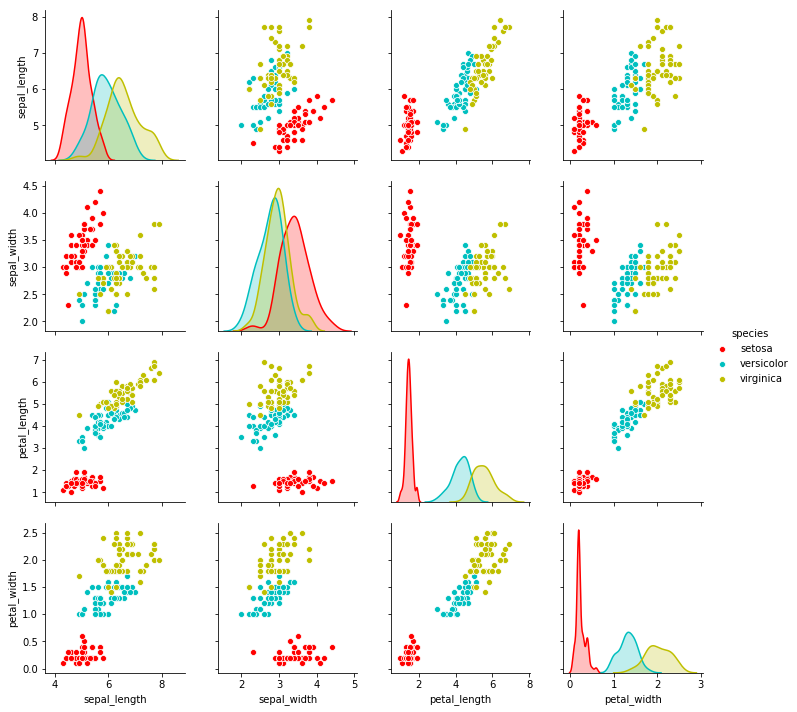

In [63]:
sns.pairplot(iris_df, hue = 'species', palette=["r", "c", "y"])

Setosa is easy to separate. Veriscolor and virginica have overlapping distributions

### Maximize class seperability with dimension reduction. 


Compare LDA and PCA and plot results to visualize

In [64]:
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [65]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [66]:
lda = LinearDiscriminantAnalysis(n_components=None)

In [67]:
features_lda = lda.fit(X_train, y_train)

In [68]:
lda_var_ratios = lda.explained_variance_ratio_

In [69]:
lda_var_ratios

array([0.99229795, 0.00770205])

In [70]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [71]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [72]:
features_lda = lda.fit(X_train, y_train).transform(X_train)

In [73]:
iris_lda_df = pd.DataFrame(features_lda)
iris_lda_df = pd.concat([iris_lda_df, pd.DataFrame(y_train)], axis = 1, ignore_index = True)

In [74]:
iris_lda_df.columns = ['lda_1', 'lda_2', 'species']

In [75]:
iris_lda_df.head()

lda_1     lda_2  species
0 -8.911102  0.802091        0
1 -9.525179  2.563805        0
2  1.380277 -0.000011        1
3 -7.303022 -0.097825        0
4 -7.334804 -0.266847        0

In [76]:
iris_lda_df['species'] = iris_lda_df['species'].map({k:v for (k,v) in enumerate(iris.target_names)})

In [77]:
iris_lda_df.head()

lda_1     lda_2     species
0 -8.911102  0.802091      setosa
1 -9.525179  2.563805      setosa
2  1.380277 -0.000011  versicolor
3 -7.303022 -0.097825      setosa
4 -7.334804 -0.266847      setosa

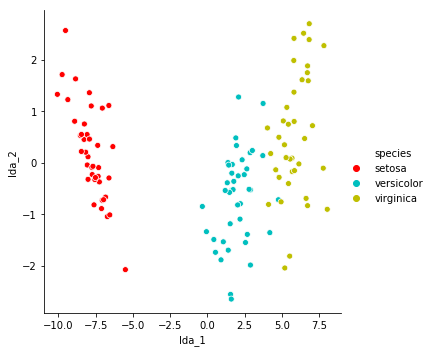

In [78]:
sns.relplot(x='lda_1', y='lda_2', hue='species', data = iris_lda_df,  palette=["r", "c", "y"])

### Good seperation. Now lets compare to PCA

In [79]:
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

In [80]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [81]:
pca = PCA(n_components=2)

In [83]:
features_pca = pca.fit(X_train).transform(X_train)

In [84]:
iris_pca_df = pd.concat([pd.DataFrame(features_pca), pd.DataFrame(y_train)], axis = 1, ignore_index = True)

In [85]:
iris_pca_df.columns = ['pca_1', 'pca_2', 'species']

In [86]:
iris_pca_df['species'] = iris_pca_df['species'].map({k:v for (k,v) in enumerate(iris.target_names)})

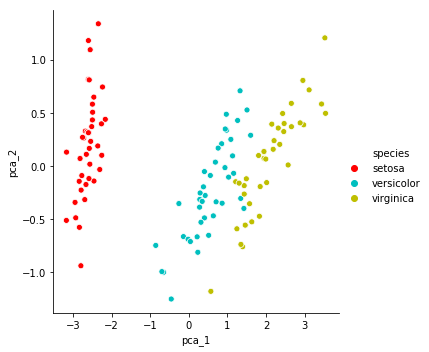

In [87]:
sns.relplot(x='pca_1', y='pca_2', hue='species', data = iris_pca_df,  palette=["r", "c", "y"])

##### How many principle components? 

### Use SVM to classify

In [88]:
from sklearn.svm import SVC # support vector classification

In [99]:
C = 1.0
clf = SVC(kernel='linear', C=C)

In [100]:
model = clf.fit(iris_pca_df[['pca_1', 'pca_2']], y_train)

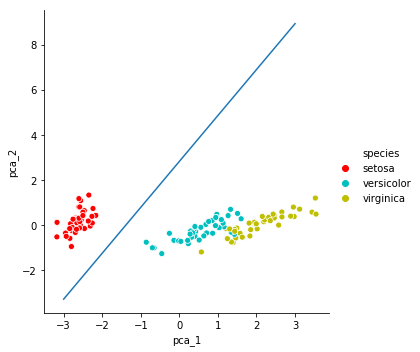

In [101]:
sns.relplot(x='pca_1', y='pca_2', hue='species', data = iris_pca_df,  palette=["r", "c", "y"])
w = clf.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-3,3)
yy= a *xx - (clf.intercept_[0])/w[1]
plt.plot(xx, yy)

In [107]:
clf.coef_

array([[-1.10875923,  0.54575503],
       [-0.59920781,  0.23860139],
       [-2.25766009,  1.58580871]])

In [ ]:
xxx = np.linspace(-3,3)
yy= a *xxx - (clf.intercept_[1])/w2[1]